(sec-denscoding)=
# Superdense coding


## The Objective

Accoring to the Halevo's bound, we can extract from a qubit only one bit of information at maximum. If we transmit some information using a qubit as carrier, it is natural to think that only one bit information can be sent. Surprisingly, we can send two bits of information by sending only a qubit.{cite}`Bennett1992`  The method is known as [*superdense coding*](https://en.wikipedia.org/wiki/Superdense_coding).  Experiments{cite}`Schaetz2004,Williams2017` confirmed that more than one bit of information can be sent with a single qubit.


## Algorithm

Alice and Bob are separated by a distance and there is no classical communication channel between them. Alice wants to send two bits of information to Bob.  Bob knows Alice is sending one of $00$, $01$ , $10$, and $11$.  Alice sent Bob a single qubit and somehow Bob received the information.  How?  If only one qubit travels from Alice to Bob, it seems not possible since it can carry only one bit of information.  Similarly to the quantum teleportation, we can use quantum entanglement.

**Step 1. Preparation**  
Alice and Bob have a qubit each, $q_A$ and $q_B$, respectively.  These two qubits are prepared in a Bell state 

$$
|\Phi^{+}\rangle = \frac{1}{\sqrt{2}}\left(|0_A 0_B\rangle + |1_A 1_B\rangle\right)
$$

where the index $A$ and $B$ indicate the owners of the qubit, Alice and Bob, respectively.

**Step 2. Encoding**    
Alice applies a unitary transformation to her qubit.  The unitary transformation depends on the information she wants to send.  
   * To send $00$, do nothing.  The state remains in $|\Phi^{+}\rangle$.
   
   * To send $01$, apply X.  The state is transformed to $|\Psi^{+}\rangle = \frac{1}{\sqrt{2}}\left(|0_A 1_B\rangle + |1_A 0_B\rangle\right)$.
   
   * To send $10$, apply Z.  The state is transformed to $|\Phi^{-}\rangle = \frac{1}{\sqrt{2}}\left(|0_A 0_B\rangle - |1_A 1_B\rangle\right)$.

   * To send $11$, apply Z $\cdot$ X.  The state is transformed to $|\Psi^{-}\rangle = \frac{1}{\sqrt{2}}\left(|0_A 1_B\rangle - |1_A 0_B\rangle\right)$.
   
**Step 3.  Transmission**  
Alice sends her qubit to Bob.

**Step 4.  Decoding**   
Bob now has two qubits.  To decode the information, Bob applies CX with $q_A$ as control and $q_B$ as target, and H on $q_A$.

  * If the state is $|\Phi^{+}\rangle$,  Bob obtains (I $\otimes$ H) $\cdot$ CX$_\text{AB}\, |\Phi^{+}\rangle = |00\rangle$.

  * If the state is $|\Psi^{+}\rangle$,  Bob obtains (I $\otimes$ H) $\cdot$ CX$_\text{AB}\, |\Psi^{+}\rangle = |01\rangle$.
  
  * If the state is $|\Phi^{-}\rangle$,  Bob obtains (I $\otimes$ H) $\cdot$ CX$_\text{AB}\, |\Phi^{-}\rangle = |10\rangle$.
  
  * If the state is $|\Psi^{-}\rangle$,  Bob obtains (I $\otimes$ H) $\cdot$ CX$_\text{AB}\, |\Psi^{-}\rangle = |11\rangle$. 
  
  **Step 4. Measurement**  
Bob measures both qubits in the computational basis.  The outcome is one of $00$, $01$, $10$, or $11$ with probability 1, which is the information Alice submitted.



## Qiskit Example

### Circuit
  
In the following Qiskit example, Alice selects a message at random, encode it and send it to Bob.  Then, Bob decodes it.  Run it several times and see the input and output are always the same.

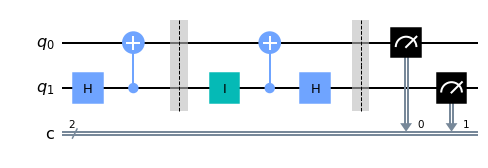

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
from qiskit.quantum_info import Statevector, partial_trace

cr=ClassicalRegister(2,'c')
qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr,cr)

# engtangle the qubit
qc.h(1)
qc.cx(1,0)
qc.barrier()

# select information to be sent at random
x=np.random.randint(3)

# Alice encodes the message
if x==0:
    messageA='00'
    qc.i(1)
elif x==1:
    messageA='01'
    qc.x(1)
elif x==2:
    messageA='10'
    qc.z(1)
else:
    messageA='11'
    qc.x(1)
    qc.z(1)

    qc.barrier()

# Bob decodes the message

qc.cx(1,0)
qc.h(1)
qc.barrier()

# measure the final state
qc.measure([0,1],[0,1])

# circuit
qc.draw('mpl')

### Execution (noiseless)

In [2]:
# Using noiseless simulator
backend = Aer.get_backend('statevector_simulator')   

result=backend.run(qc).result()
psi = result.get_statevector()

In [3]:
# Show results

print("Allice sent the message:", messageA)
# visualize the state Alice sent
from qiskit.visualization import plot_state_qsphere



Allice sent the message: 00


The state Bob finds.


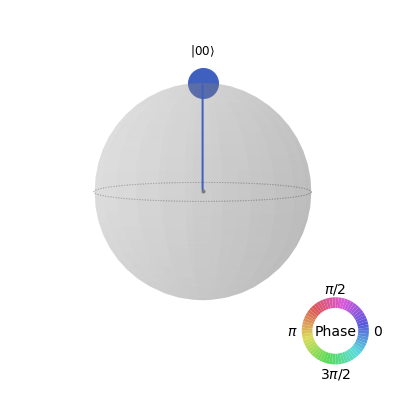

In [4]:
# visualize the decoded state
print("The state Bob finds.")
plot_state_qsphere(psi)

In [5]:
messageB=list(psi.to_dict().keys())

if len(messageB)==1:
    print("Bob finds the message = ",messageB[0])
    if messageA == messageB[0]:
        print("the communication was succerss!")
else:
    print("the communication failed.")

Bob finds the message =  00
the communication was succerss!


### Execution (noisy)

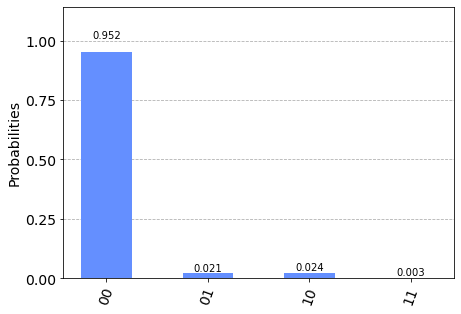

In [6]:
# simulating IBL Jakarta device
from qiskit.providers.fake_provider import FakeJakarta

backend = FakeJakarta()

# set the number of tries
nshots=8192

# execute the circuit
job = backend.run(qc,shots=nshots)

# get the results
result = job.result()

# get statistics
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

With a high probability, Bob gets the correct message.


---

Last modified on 08/31/2022.
